In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_csv('Value_of_Energy_Cost_Savings_Program.csv')

#keep only the columns we need, and give them better names

df['New jobs'] = df['Job created'].fillna(0)
df['Month'] = pd.to_datetime(df['Effective Date']).dt.to_period("M")

df = df[['Company Name', 'company email','Borough','NTA','Total Savings','New jobs','Month']]
df.rename(columns={'Company Name':'Company','company email':'Email'},inplace=True)

df.head()

,Company,Email,Borough,NTA,Total Savings,New jobs,Month
0,1 State Street,eskoblo@energyspec.com,Brooklyn,Midwood,0.00,0.0,2005-03
1,100 Church LLC,NaN,New York,SoHo-TriBeCa-Civic Center-Little Italy,136578.20,0.0,2008-04
2,100 Wall Investments,NaN,New York,Battery Park City-Lower Manhattan,302959.40,0.0,2015-01
3,1-10 Bush Terminal Owner LP,akimball@industrycity.com,Brooklyn,Sunset Park West,2159.67,0.0,2020-02
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",clettich@silvprop.com,New York,Battery Park City-Lower Manhattan,922407.32,0.0,2017-06


In [2]:
N = len(df)

print('There are', N,'companies represented in the data set.')
#There are 450 companies represented in the data set.

There are 450 companies represented in the data set.


In [3]:
#Find the number of jobs created in the borough of Queens

borough = df['Borough']
jobs = df['New jobs']
L = [jobs[k] for k in range(N) if borough[k]=='Queens']

queens_jobs = sum(L)
print('There were',int(queens_jobs),'jobs created in Queens.')
#There were 102 jobs created in Queens.

There were 102 jobs created in Queens.


In [4]:
#Find the number of unique domain names

domain_list = df['Email']
at = '@'

for address in domain_list:
    if isinstance(address,str) and at in address:
        idx = address.index(at)
        address = address[idx+1:]

print('There are',domain_list.nunique(),'unique domain names in the dataset.')
#There are 420 unique domain names in the dataset.

There are 420 unique domain names in the dataset.


In [13]:
NTA_groupby = df.groupby('NTA')
NTA_list = NTA_groupby.size()

#NTA5 is the list of NTAs with at least 5 companies in our dataframe df
NTA5 = [NTA for NTA in NTA_list.keys() if NTA_list[NTA] >= 5]        
        
#compute average total savings and average number of new jobs for each NTA in our list NTA5
df_columns = NTA_groupby[['Total Savings','New jobs']].mean()

#new_df contains the entries of df_columns whose NTA is in the list NTA5
df5 = df_columns.filter(items=NTA5, axis=0)

xString = 'Average savings'
yString = 'Average number of new jobs'

#rename the columns - these are now averages over each NTA's set of companies
df5.rename(columns = {'Total Savings':xString, 'New jobs':yString}, inplace = True)

# print(df5)

# Save the results in the file df5.csv
# df5.to_csv("df5.csv")

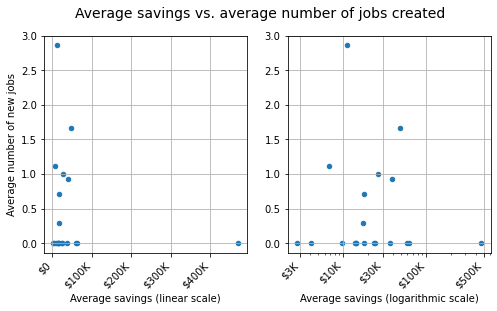

In [16]:
#plot average savings vs average number of new jobs, for NTAs with at least five companies

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(8,4))

df5.plot.scatter(x=xString, y=yString, ax=axs[0])
df5.plot.scatter(x=xString, y=yString,ax=axs[1],logx=True)

fig.suptitle('Average savings vs. average number of jobs created',fontsize=14)
axs[0].set_xlabel('Average savings (linear scale)')
axs[1].set_xlabel('Average savings (logarithmic scale)')

axs[1].set_ylabel('')

for i in range(0,2):
    axs[i].grid()

axs[0].set_xticks(np.linspace(0,400000,5))
axs[0].set_xticklabels(['$0','$100K','$200K','$300K','$400K'])

savings_loc = [3000,10000,30000,100000,500000] #location of tick marks on log savings axis
savings_label = ['$3K','$10K','$30K','$100K','$500K'] #labels of tick marks on log savings axis

axs[1].set_xticks(np.array(savings_loc))
axs[1].set_xticklabels(savings_label)

#rotate tick labels on x axes to be diagonal
for i in range(0,2):
    labels = axs[i].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

Text(0.5, 0, 'Average savings')

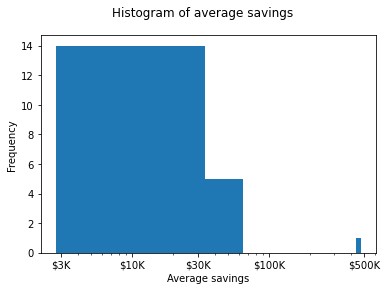

In [19]:
fig2, ax2 = plt.subplots()

df5['Average savings'].plot(kind='hist', logx=True, ax=ax2, bins=15,histtype='bar')

ax2.set_xticks(savings_loc)
ax2.set_xticklabels(savings_label)

fig2.suptitle('Histogram of average savings')
ax2.set_xlabel('Average savings')

Text(0.5, 0.98, 'New jobs (each month)')

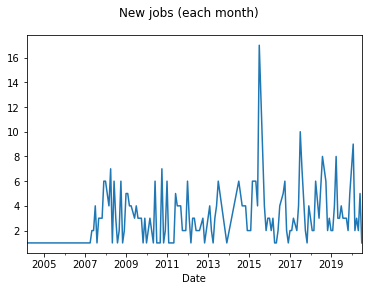

In [24]:
jobs_per_month = df.groupby('Month').size()

#delete the one entry from 1993 -- all the others are from 2004 or later
jobs_per_month = jobs_per_month[1:] 

# print(jobs_per_month)

fig3, ax3 = plt.subplots()

jobs_per_month.plot(ax=ax3)
ax3.set_xlabel('Date')
fig3.suptitle('New jobs (each month)')